In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# getting the inbuilt MNIST dataset from tensorflow
data = tf.keras.datasets.mnist

# performing train test split
(x_train, y_train), (x_test, y_test) = data.load_data()

# converting the pixel values to range (0-1) form (0-255)
x_train, x_test = x_train/255 , x_test/255

# converting integer labeles to binary matrices to use categorical_crossentropy loss fn
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

# reshaping the image array 
x_train = x_train.reshape(
    x_train.shape[0], x_train.shape[1], x_train.shape[2], 1
)
x_test = x_test.reshape(
    x_test.shape[0], x_test.shape[1], x_test.shape[2], 1
)


In [3]:
# preparing convolutional neural network
model = tf.keras.models.Sequential([
        
        # adding convolutional layer with 32 filters with 3x3 kernal
        tf.keras.layers.Conv2D(32 , (3, 3), activation="relu", input_shape = (28, 28, 1)),
        
        # adding max-pooling layer with size of 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # flattening all the units
        tf.keras.layers.Flatten(),
        
        # adding hidden layer with 128 neurons with 50% dropout
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        
        # adding output layer with 10 units to get probablity for 10 digits with softmax activation fn
        tf.keras.layers.Dense(10, activation="softmax")   
])

In [4]:
# compiling the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics="accuracy"
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [5]:
# training the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,  y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2604 - accuracy: 0.9219 - val_loss: 0.0745 - val_accuracy: 0.9762
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1122 - accuracy: 0.9667 - val_loss: 0.0515 - val_accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0849 - accuracy: 0.9737 - val_loss: 0.0462 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0696 - accuracy: 0.9787 - val_loss: 0.0456 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.0365 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0501 - accuracy: 0.9844 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0449 - accuracy: 0.9850 - val_loss: 0.0365 - val_a

313/313 - 1s - loss: 0.0367 - accuracy: 0.9883 - 732ms/epoch - 2ms/step


[0.036722004413604736, 0.9883000254631042]

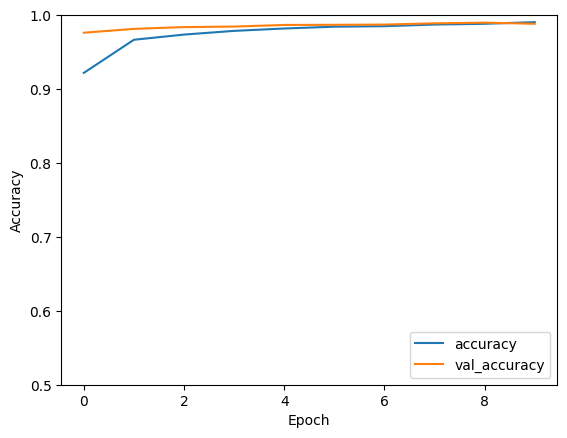

In [6]:
# plotting evaluation graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluating the model and storing results
model.evaluate(x_test,  y_test, verbose=2)